# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [122]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,Unnamed: 0,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [123]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [124]:
# domgross is the outcome variable

X = pd_df[["budget", "imdbRating", "Metascore", "imdbVotes"]]
y = pd_df[["domgross"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [125]:
#Your code here
df_train = pd.concat([X_train, y_train], ignore_index=True, axis=1)
df_test = pd.concat([X_test, y_test], ignore_index=True, axis=1)

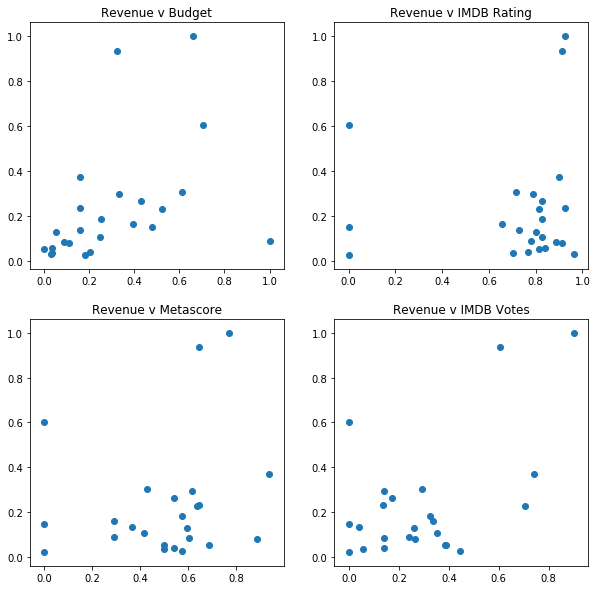

In [126]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

axes[0,0].scatter(X_train['budget'], y_train, label='Revenue v Budget')
axes[0,1].scatter(X_train['imdbRating'], y_train, label='Revenue v IMDB Rating')
axes[1,0].scatter(X_train['Metascore'], y_train, label='Revenue v Metascore')
axes[1,1].scatter(X_train['imdbVotes'], y_train, label='Revenue v IMDB Votes')

axes[0,0].title.set_text('Revenue v Budget')
axes[0,1].title.set_text('Revenue v IMDB Rating')
axes[1,0].title.set_text('Revenue v Metascore')
axes[1,1].title.set_text('Revenue v IMDB Votes')

## Fit a regression model to the training data and look at the coefficients

In [127]:
# Your code 
reg = LinearRegression(fit_intercept=True)
model = reg.fit(X_train, y_train)



In [128]:
# Inspect coefficients
coefficients = list(model.coef_)
variable_names = ['budget', 'IMDBRating', 'Metascore', 'IMDBVotes']


## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- A line showing the diagonal of y_train. The actual y_train values are on this line
- Next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

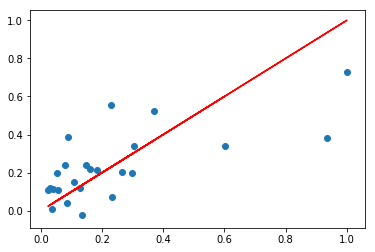

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
# your code here

y_pred_train = model.predict(X_train)

plt.scatter(y_train, y_pred_train)
plt.plot(y_train,y_train, color='red')


## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

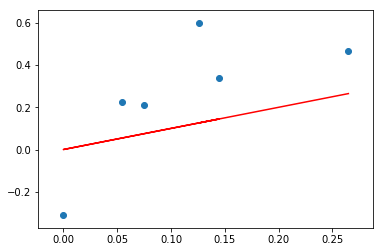

In [130]:
# your code here

y_pred_test = model.predict(X_test)

plt.scatter(y_test, y_pred_test)
plt.plot(y_test,y_test, color='red')


## Calculate the bias
Create a function `bias` to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [131]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat) - np.mean(y)

## Calculate the variance
Create a function `variance` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [132]:
def variance(y_hat):
    y_hat_array = np.array(y_hat)
    y_hat_array_squared = y_hat_array**2
    n = len(y_hat)
    first_term = np.mean(y_hat_array_squared)
    second_term = (np.mean(y_hat_array))**2
    return first_term - second_term
    
    

## Use your functions to calculate the bias and variance of your model. Do this separately for the train and test sets.

In [133]:
# code for train set bias and variance

print('Bias:', bias(y_train, y_pred_train)[0])
print('Variance:', variance(y_pred_train))

# Bias: 2.901719268906659e-17 
# Variance: 0.027449331056376085

Bias: -8.326672684688674e-17
Variance: 0.03195354655433544


In [134]:
# code for test set bias and variance

print('Bias:', bias(y_test, y_pred_test)[0])
print('Variance:', variance(y_pred_test))

# Bias: 0.05760433770819166 
# Variance: 0.009213684542614783

Bias: 0.14428871552663508
Variance: 0.08176646686739758


## Describe in words what these numbers can tell you.

In [135]:
# Your description here
# Bias is larger for the training set than the test set
# Variance is larger for the test set than the training set

# Suggests that the model is underfitted

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [136]:
from sklearn.preprocessing import PolynomialFeatures\
# your code here

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(3)  
X_fin = poly.fit_transform(X_train)
X_fin.shape

(24, 35)

In [137]:
reg = LinearRegression(fit_intercept=True)
model = reg.fit(X_fin, y_train)


## Plot your overfitted model's training predictions against the actual data

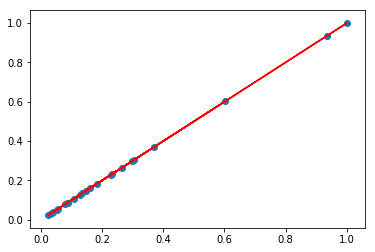

In [138]:
# your code here
y_train_pred = model.predict(X_fin)

plt.scatter(y_train, y_train_pred)
plt.plot(y_train,y_train, color='red')


Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [139]:
# your code here

print('Bias:', bias(y_train, y_train_pred)[0])
print('Variance:', variance(y_train_pred))

# Bias: -2.5421584029769207e-16 
# Variance: 0.07230707736656222

Bias: 5.717648576819556e-15
Variance: 0.06631647097412303


## Plot your overfitted model's test predictions against the actual data.

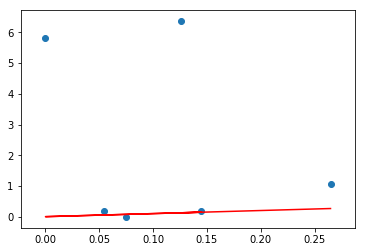

In [140]:
# your code here

poly = PolynomialFeatures(3)  
X_test_fin = poly.fit_transform(X_test)

y_test_pred = model.predict(X_test_fin)

plt.scatter(y_test, y_test_pred)
plt.plot(y_test,y_test, color='red')


##  Calculate the bias and variance for the test set.

In [142]:
# your code here

print('Bias:', bias(y_test, y_test_pred)[0])
print('Variance:', variance(y_test_pred))

# Bias: -0.16998568902304564 
# Variance: 0.3596092440273582

Bias: 2.1548926559649337
Variance: 7.466598195522908


## Describe what you notice about the bias and variance statistics for your overfit model

In [ ]:
# Your description here

# Bias and variance much greater for the test set.  Suggests model is overfitted - does not generalise to test data

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using a pretty "simple" model, and a very complex model. 